In [1]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
url = 'http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes'
response=requests.get(url)
data=response.json()
df=pd.DataFrame(data['_embedded']['episodes'])
df.head(1)

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,rating,image,summary,_links
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,2016-10-03T01:00:00+00:00,68,{'average': 8},{'medium': 'https://static.tvmaze.com/uploads/...,<p>A woman named Dolores is a free spirit in t...,{'self': {'href': 'https://api.tvmaze.com/epis...


In [4]:
df.shape

(36, 14)

In [5]:
# Converting dict to float
df['rating']=df['rating'].apply(lambda x:list(x.values())[0])

In [6]:
# object to datetime format
df['airdate']=pd.to_datetime(df['airdate'])
df['airtime']=pd.to_datetime(df['airtime']).dt.strftime('%I:%M')

In [7]:
df['summary'] = df['summary'].str.replace(r'<[^<>]*>', '', regex=True)

In [8]:
df.drop(columns=['id','url','image','_links','type'],inplace=True)

1. Ratings by Season

In [9]:
ratings_by_season=pd.DataFrame(df.groupby('season').sum()['rating'])
ratings_by_season

C:\Users\HP\AppData\Local\Temp\ipykernel_23432\2107892136.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ratings_by_season=pd.DataFrame(df.groupby('season').sum()['rating'])


,rating
season,
1,80.9
2,80.0
3,62.2
4,60.3


In [10]:
season=list(ratings_by_season.index)

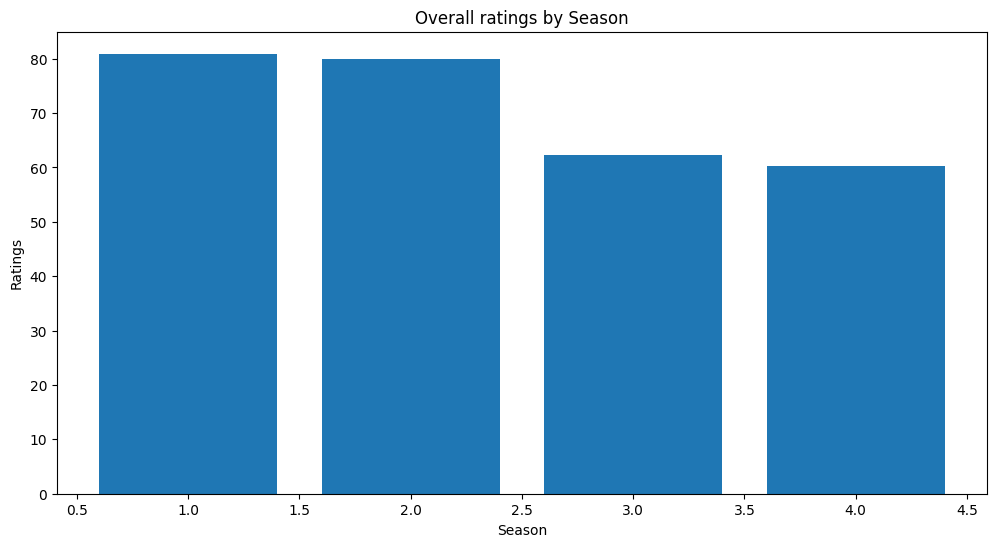

In [11]:
plt.figure(figsize=(12,6))
plt.bar(season,ratings_by_season['rating'])
plt.xlabel('Season')
plt.ylabel('Ratings')
plt.title('Overall ratings by Season')
plt.show()

2. Episode names, whose average rating is more than 8 for every season

In [42]:
df[df['rating']>8]['name']

6                 Trompe L'Oeil
8     The Well-Tempered Clavier
9            The Bicameral Mind
17                      Kiksuya
18              Vanishing Point
19                The Passenger
Name: name, dtype: object

3. Episodes before May 2019

In [12]:
episode_before_may_2019=df[df['airdate']<'2019-05-01']['name']
episode_before_may_2019

0                  The Original
1                      Chestnut
2                     The Stray
3             Dissonance Theory
4                   Contrapasso
5                 The Adversary
6                 Trompe L'Oeil
7                   Trace Decay
8     The Well-Tempered Clavier
9            The Bicameral Mind
10           Journey Into Night
11                      Reunion
12              Virtù e Fortuna
13     The Riddle of the Sphinx
14                 Akane No Mai
15                  Phase Space
16                 Les Écorchés
17                      Kiksuya
18              Vanishing Point
19                The Passenger
Name: name, dtype: object

4. Episode name from each season with the highest and lowest rating

In [19]:
episode_with_lowest_rating=df.groupby('season').max()[['name','rating']]
episode_with_highest_rating=df.groupby('season').min()[['name','rating']]

In [20]:
episode_with_lowest_rating['season'] = list(episode_with_lowest_rating.index)
episode_with_highest_rating['season'] = list(episode_with_lowest_rating.index)

In [21]:
episode_with_lowest_and_highest_rating=pd.DataFrame(np.vstack([episode_with_highest_rating,episode_with_lowest_rating]),columns=episode_with_lowest_rating.columns)

In [22]:
episode_with_lowest_and_highest_rating 

,name,rating,season
0,Chestnut,7.6,1
1,Akane No Mai,7.6,2
2,Crisis Theory,7.5,3
3,Années Folles,7.1,4
4,Trompe L'Oeil,8.7,1
5,Virtù e Fortuna,8.7,2
6,The Winter Line,8.0,3
7,Zhuangzi,7.8,4


C:\Users\HP\AppData\Local\Temp\ipykernel_23432\880937294.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(episode_with_lowest_and_highest_rating['name'], rotation='vertical')


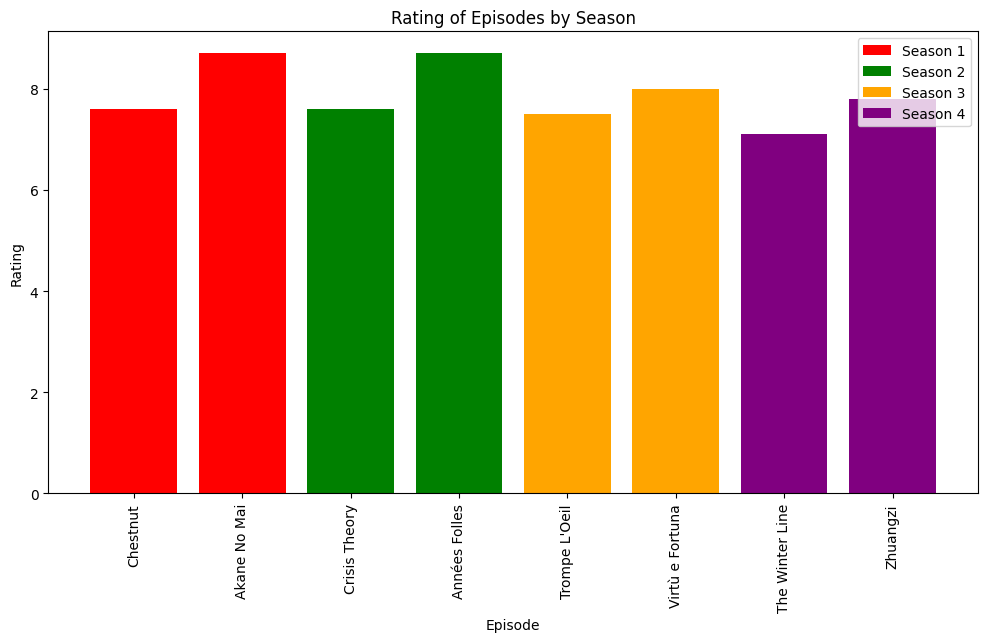

In [25]:
fig, ax = plt.subplots(figsize=(12, 6))
colors = ['red', 'green', 'orange', 'purple']
grouped_episodes = episode_with_lowest_and_highest_rating.groupby('season')

for i, (season, group) in enumerate(grouped_episodes):
    bars = ax.bar(group['name'], group['rating'], color=colors[i], label='Season {}'.format(season))

ax.set_xlabel('Episode')
ax.set_xticklabels(episode_with_lowest_and_highest_rating['name'], rotation='vertical')

ax.set_ylabel('Rating')
ax.set_title('Rating of Episodes by Season')
ax.legend(loc='upper right')
plt.show()

5. Summary for the most popular ( ratings ) episode in every season

In [43]:
for i in range(len(df.groupby('season'))):
    print(df.groupby('season').max()['summary'].iloc[i])

While William and Dolores travel to the unclaimed territories, Charlotte and Theresa make plans to force Robert out of the park using Clementine. Meanwhile, Maeve continues her plans to escape Westworld.
William pays his recuperating father-in-law several visits. Meanwhile, the Man continues to play Robert's game, and Bernard remembers some of his missing time.
Time to face the music. Dolores' true intentions are revealed; Bernard confronts a ghost from his past; Maeve is conflicted; Serac's voice is dominant; Caleb's role is revealed; and William faces an unexpected villain.  
You want to have a drink at a time like this?
